#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
    import warnings
    warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('Final_Train.csv')

In [4]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### This problem is Linear Regression Problem

In [5]:
data.shape

(5961, 7)

In [6]:
data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

## EDA Process

In [7]:
data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

### Checking null values in dataset 

In [8]:

data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [9]:
print("Number of Categories: ")
for ColName in data[['Qualification','Experience','Profile','Rating','Miscellaneous_Info','Place','Fees']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
Qualification = 1420
Experience = 64
Profile = 6
Rating = 52
Miscellaneous_Info = 2999
Place = 878
Fees = 40


Observation: Rating, Place and Miscellaneous_Info is having null values

### Handling null values

In [10]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [11]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=data[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     data[ColName] = data[ColName]
     data[ColName].fillna(most_frequent_category,inplace=True)

In [12]:
#2. Call function to impute most occured category
for Columns in ['Rating','Miscellaneous_Info','Place']:
    impute_nan_most_frequent_category(data,Columns)
    
# Display imputed result
data[['Rating','Miscellaneous_Info','Place']].head(10)

,Rating,Miscellaneous_Info,Place
0,100%,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam"
1,98%,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore"
2,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Mathikere - BEL, Bangalore"
3,100%,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore"
4,100%,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai"
5,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Porur, Chennai"
6,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Karol Bagh, Delhi"
7,99%,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore"
8,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Old City, Hyderabad"
9,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Athani, Ernakulam"


In [13]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [14]:
#3. Drop actual columns if we have renamed the columns
#data = data.drop(['Rating','Miscellaneous_Info','Place'], axis = 1)

In [15]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [16]:
#Rechecking null values in dataset 
data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

Observation: Null values are handled

# Data Cleaning

##  Skewness

In [17]:
data.skew()

Fees    0.75187
dtype: float64

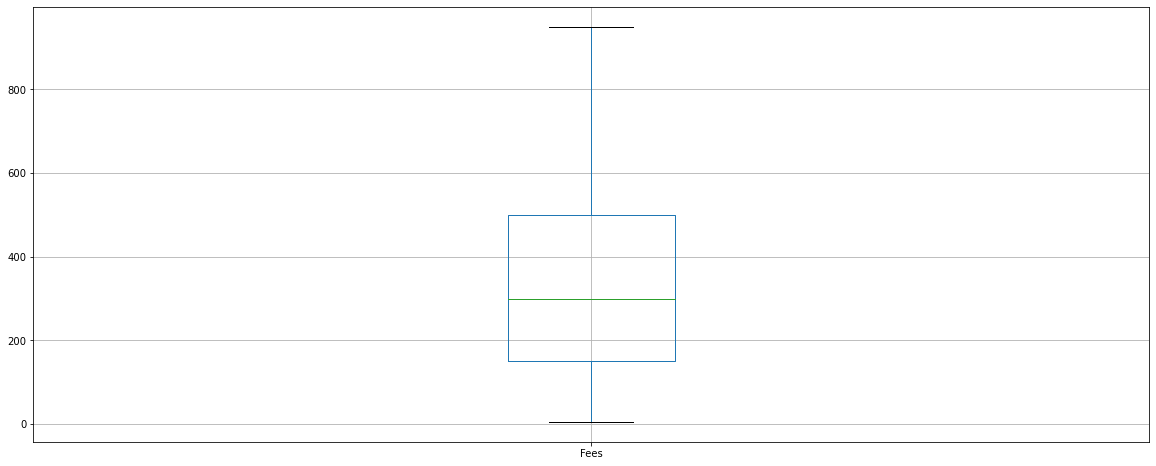

In [18]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

Here, Fees is target variable so no need to handle skewness or outliers

In [19]:
    data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Observation: Here all the columns are categorical type and target value is int but as there  are all feature variable as  categorical data , there is no need to hangle skewness .

# Feature Engineering

Can be done with Miscellaneous_Info but, no need as it seems minimum(negative) correlation in further steps

# Data Encoding

As the data are categorical, so need to encode the data.

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [21]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [22]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,16.0,0.0,299.0,5.0,130.0,100
1,73.0,3.0,49.0,866.0,0.0,1422.0,350
2,1135.0,63.0,0.0,457.0,3.0,1595.0,300
3,464.0,3.0,0.0,68.0,0.0,1695.0,250
4,10.0,12.0,0.0,337.0,0.0,253.0,250
...,...,...,...,...,...,...,...
5956,1075.0,10.0,49.0,70.0,3.0,1385.0,300
5957,596.0,26.0,0.0,541.0,4.0,1595.0,100
5958,596.0,35.0,48.0,216.0,4.0,1173.0,600
5959,943.0,6.0,41.0,850.0,4.0,2202.0,100


# Visualization of the Data:

For categorical data we can use: counterplot and for numerical data we can use: distplot 

In [23]:
data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

134.0     488
351.0     477
10.0      471
596.0     334
1075.0    220
         ... 
1134.0      1
925.0       1
587.0       1
625.0       1
1162.0      1
Name: Qualification, Length: 1420, dtype: int64


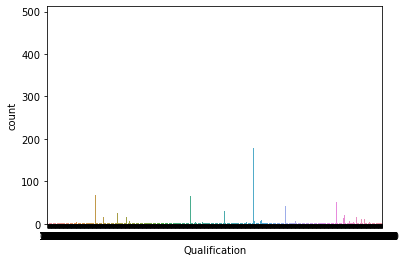

In [24]:
import seaborn as sns
alpha = sns.countplot(x="Qualification",data=data)
print(data["Qualification"].value_counts())

63.0    323
1.0     294
2.0     288
62.0    282
3.0     279
       ... 
59.0      1
57.0      1
54.0      1
58.0      1
53.0      1
Name: Experience, Length: 64, dtype: int64


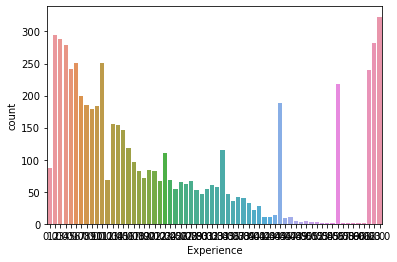

In [25]:
import seaborn as sns
alpha = sns.countplot(x="Experience",data=data)
print(data["Experience"].value_counts())

1.0    1397
4.0    1173
2.0    1034
5.0     843
0.0     786
3.0     728
Name: Profile, dtype: int64


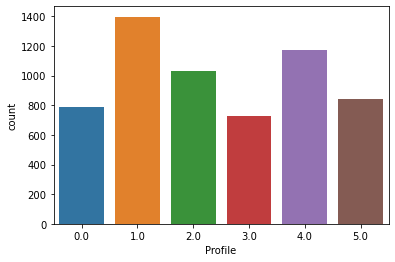

In [26]:
import seaborn as sns
alpha = sns.countplot(x="Profile",data=data)
print(data["Profile"].value_counts())

0.0     3986
49.0     290
50.0     259
48.0     241
47.0     220
46.0     178
45.0     115
44.0     109
41.0      66
43.0      66
42.0      60
40.0      42
39.0      41
36.0      27
33.0      23
37.0      21
34.0      21
31.0      19
28.0      16
38.0      14
30.0      13
35.0      13
17.0      12
32.0      12
22.0       9
27.0       9
26.0       8
24.0       8
12.0       7
25.0       7
29.0       6
9.0        5
18.0       5
19.0       4
21.0       4
10.0       3
23.0       3
14.0       2
1.0        2
8.0        2
13.0       2
15.0       2
4.0        1
20.0       1
3.0        1
2.0        1
16.0       1
5.0        1
11.0       1
7.0        1
6.0        1
Name: Rating, dtype: int64


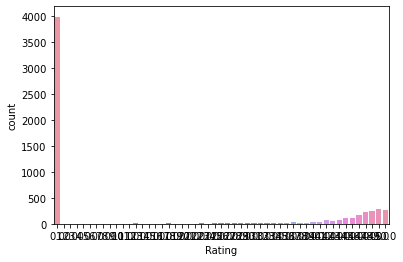

In [27]:
import seaborn as sns
alpha = sns.countplot(x="Rating",data=data)
print(data["Rating"].value_counts())

228.0    100
27.0      70
170.0     67
67.0      64
493.0     54
        ... 
571.0      1
381.0      1
637.0      1
714.0      1
487.0      1
Name: Place, Length: 877, dtype: int64


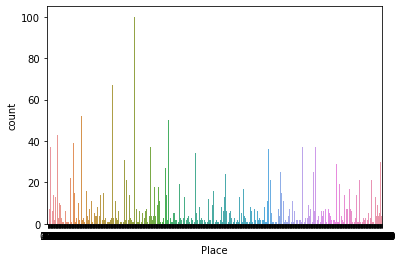

In [28]:
import seaborn as sns
alpha = sns.countplot(x="Place",data=data)
print(data["Place"].value_counts())

### Correlation

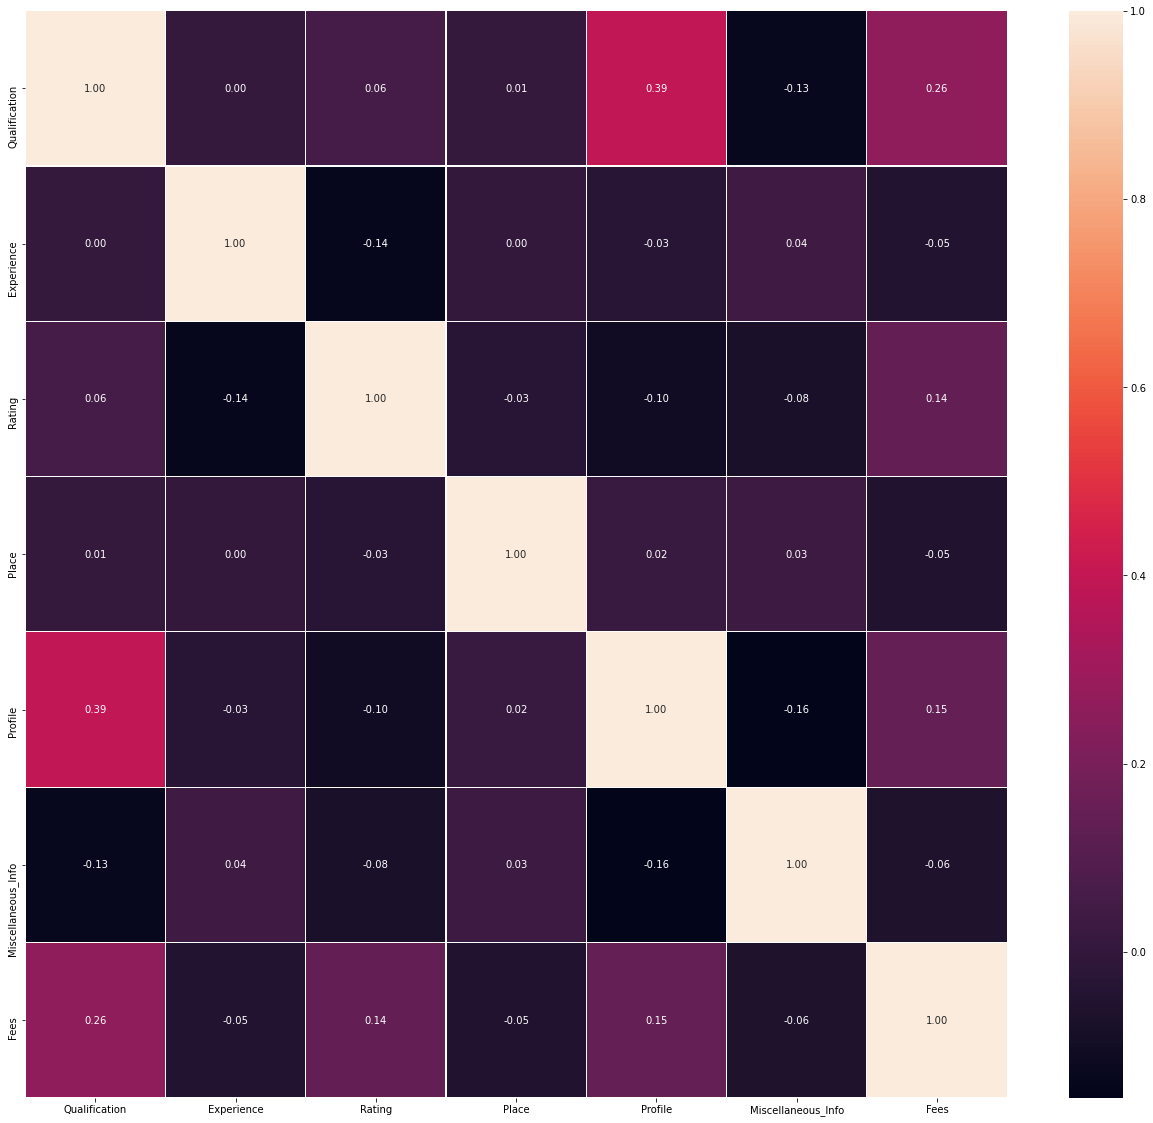

In [29]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [30]:
corr_matrix_hmap["Fees"].sort_values(ascending=False)

Fees                  1.000000
Qualification         0.263214
Profile               0.145226
Rating                0.141853
Experience           -0.048529
Place                -0.052505
Miscellaneous_Info   -0.060713
Name: Fees, dtype: float64

Correlations are checked on the basis of target variable, i.e Fees

max corelated is Qualification then, Place the, Rating and so on in decresing manner

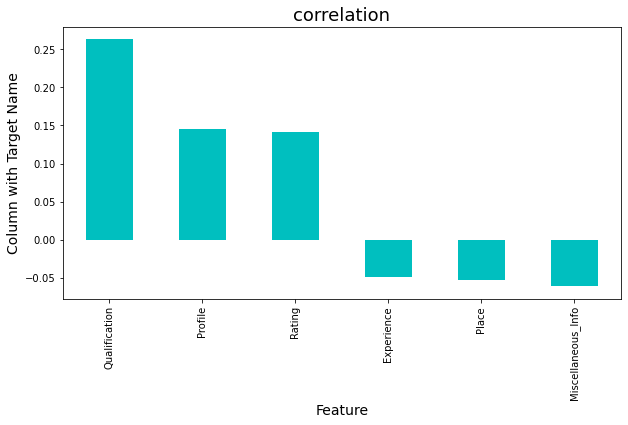

In [31]:
plt.figure(figsize=(10,5))
data.corr()['Fees'].sort_values(ascending=False).drop(['Fees']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Observation : Maximum correlation with fees is based on Qualification.

Negative correlation with fees is Miscellaneous, Place  

Even, Experience is negatively correlated

# Seperating Independent variable and Target Variable

In [32]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401.0,16.0,0.0,299.0,5.0,130.0
1,73.0,3.0,49.0,866.0,0.0,1422.0
2,1135.0,63.0,0.0,457.0,3.0,1595.0
3,464.0,3.0,0.0,68.0,0.0,1695.0
4,10.0,12.0,0.0,337.0,0.0,253.0


In [33]:
#y = target variable = Fees 
y = data.iloc[:,-1]
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [34]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,16.0,0.0,299.0,5.0,130.0,100
1,73.0,3.0,49.0,866.0,0.0,1422.0,350
2,1135.0,63.0,0.0,457.0,3.0,1595.0,300
3,464.0,3.0,0.0,68.0,0.0,1695.0,250
4,10.0,12.0,0.0,337.0,0.0,253.0,250


In [35]:
x.shape

(5961, 6)

In [36]:
y.shape

(5961,)

## SCALING the data using Min-Max Scaler

In [37]:
data.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,1573.343902,307.944640
std,413.842446,20.937163,21.137633,258.547684,1.658014,640.388185,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,950.000000


As there is alot of diffrence between MIN-MAX there need to be data to be SCALED

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [39]:
data=mms.fit_transform(data)

In [40]:
data

array([[0.28259338, 0.25396825, 0.        , ..., 1.        , 0.04337671,
        0.1005291 ],
       [0.05144468, 0.04761905, 0.98      , ..., 0.        , 0.47447447,
        0.36507937],
       [0.79985906, 1.        , 0.        , ..., 0.6       , 0.53219887,
        0.31216931],
       ...,
       [0.42001409, 0.55555556, 0.96      , ..., 0.8       , 0.39139139,
        0.62962963],
       [0.6645525 , 0.0952381 , 0.82      , ..., 0.8       , 0.73473473,
        0.1005291 ],
       [0.17124736, 0.12698413, 0.        , ..., 0.2       , 0.53219887,
        0.20634921]])

# Model Training

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state = 42)

In [42]:
x_train.shape

(4172, 6)

In [43]:
y_train.shape

(4172,)

In [44]:
x_test.shape

(1789, 6)

In [45]:
y_test.shape

(1789,)

In [46]:
data.shape

(5961, 7)

### Finding Best Random State

In [47]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    mse = r2_score(y_test,predrf)
    if mse > maxAccu:
        maxAccu = mse
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)
    
    
    

Best score is:  0.11409751040806781 on Random_state 25


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state = 25)

In [49]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)


In [50]:
print('r2 Score:',r2_score(y_test,predrf))

r2 Score: 0.11409751040806781


In [51]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
maxAccu=0
maxRS=0

from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
        
    
    
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 cv score is 0.09129174430620096 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 3 cv score is 0.09066827473101939 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 4 cv score is 0.09140676682084592 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 5 cv score is 0.08973676252233301 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 6 cv score is 0.08977385272542593 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 7 cv score is 0.08971894061513232 and accuracy score training is 0.08328217109146319 and accuracy for the testing is 0.11409751040806781


At cross fold 8 cv score is 0.09037979624356349 and accuracy score training is 0.0

#### Observation: As At Fold 6, the diffrence between cross validation score and accuracy is least, will choose fold 6

## Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [52]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [53]:
#Lasso tries to ommit coefficient value (the value which dont affect y)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [57]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.11409749443012618

In [58]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(ls,x,y,cv=6)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.08977385319703256

## Ensemble Technique

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [60]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)



R2 Score: 18.840317948393427
Cross Validation Score: 17.450790943681145


# Saving Model

In [61]:
import pickle
filename = "Doctor_Fees.pkl"
pickle.dump(rf,open(filename,"wb"))


In [62]:
loaded_model=pickle.load(open('Doctor_Fees.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.18840317948393426


In [63]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788
Predicted,408.0,254.25,392.0,297.6,152.6,252.5,453.0,277.5,307.75,376.0,...,338.3,337.5,238.3,327.0,397.5,199.3,438.5,300.75,229.5,375.0
Original,408.0,254.25,392.0,297.6,152.6,252.5,453.0,277.5,307.75,376.0,...,338.3,337.5,238.3,327.0,397.5,199.3,438.5,300.75,229.5,375.0


# TEST DATASET

In [64]:
df = pd.read_csv('Final_Test.csv')

In [65]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [66]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Mulund West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


In [67]:
df.shape

(1987, 6)

In [68]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

# Data Cleaning

In [69]:
print("Number of Categories: ")
for ColName in df[['Qualification','Experience','Profile','Rating','Miscellaneous_Info','Place']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Number of Categories: 
Qualification = 630
Experience = 57
Profile = 6
Rating = 37
Miscellaneous_Info = 1085
Place = 593


In [70]:
#checking null values in dataset 
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [71]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(df,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=df[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     df[ColName] = df[ColName]
     df[ColName].fillna(most_frequent_category,inplace=True)

In [72]:
#2. Call function to impute most occured category
for Columns in ['Rating','Miscellaneous_Info','Place']:
    impute_nan_most_frequent_category(df,Columns)
    
# Display imputed result
df[['Rating','Miscellaneous_Info','Place']].head(10)

,Rating,Miscellaneous_Info,Place
0,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Ghatkopar East, Mumbai"
1,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"West Marredpally, Hyderabad"
2,70%,"70% 4 Feedback KK Nagar, Chennai","KK Nagar, Chennai"
3,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"New Ashok Nagar, Delhi"
4,100%,General Dentistry Conservative Dentistry Cosme...,"Kanakpura Road, Bangalore"
5,90%,Acrylic Partial Denture Impaction / Impacted T...,"Velachery, Chennai"
6,94%,"94% 6 Feedback Frazer Town, Bangalore","Frazer Town, Bangalore"
7,94%,RCT - Root Canal Treatment Ceramic Veneers / C...,"Attapur, Hyderabad"
8,99%,"99% 203 Feedback Banashankari, Bangalore","Banashankari, Bangalore"
9,100%,Acrylic Partial Denture Crowns and Bridges Fix...,"Mayur Vihar Ph-I, Delhi"


In [73]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists,Acrylic Partial Denture Crowns and Bridges Fix...
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [74]:
#Rechecking null values in dataset 
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [75]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [76]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [77]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0.0,142.0,4.0,598.0
1,340.0,24.0,0.0,580.0,3.0,598.0
2,258.0,34.0,9.0,212.0,2.0,153.0
3,6.0,0.0,0.0,374.0,0.0,598.0
4,79.0,7.0,0.0,231.0,1.0,816.0
...,...,...,...,...,...,...
1982,17.0,1.0,0.0,58.0,0.0,598.0
1983,548.0,33.0,0.0,96.0,2.0,598.0
1984,474.0,56.0,0.0,424.0,4.0,598.0
1985,51.0,3.0,34.0,26.0,1.0,975.0


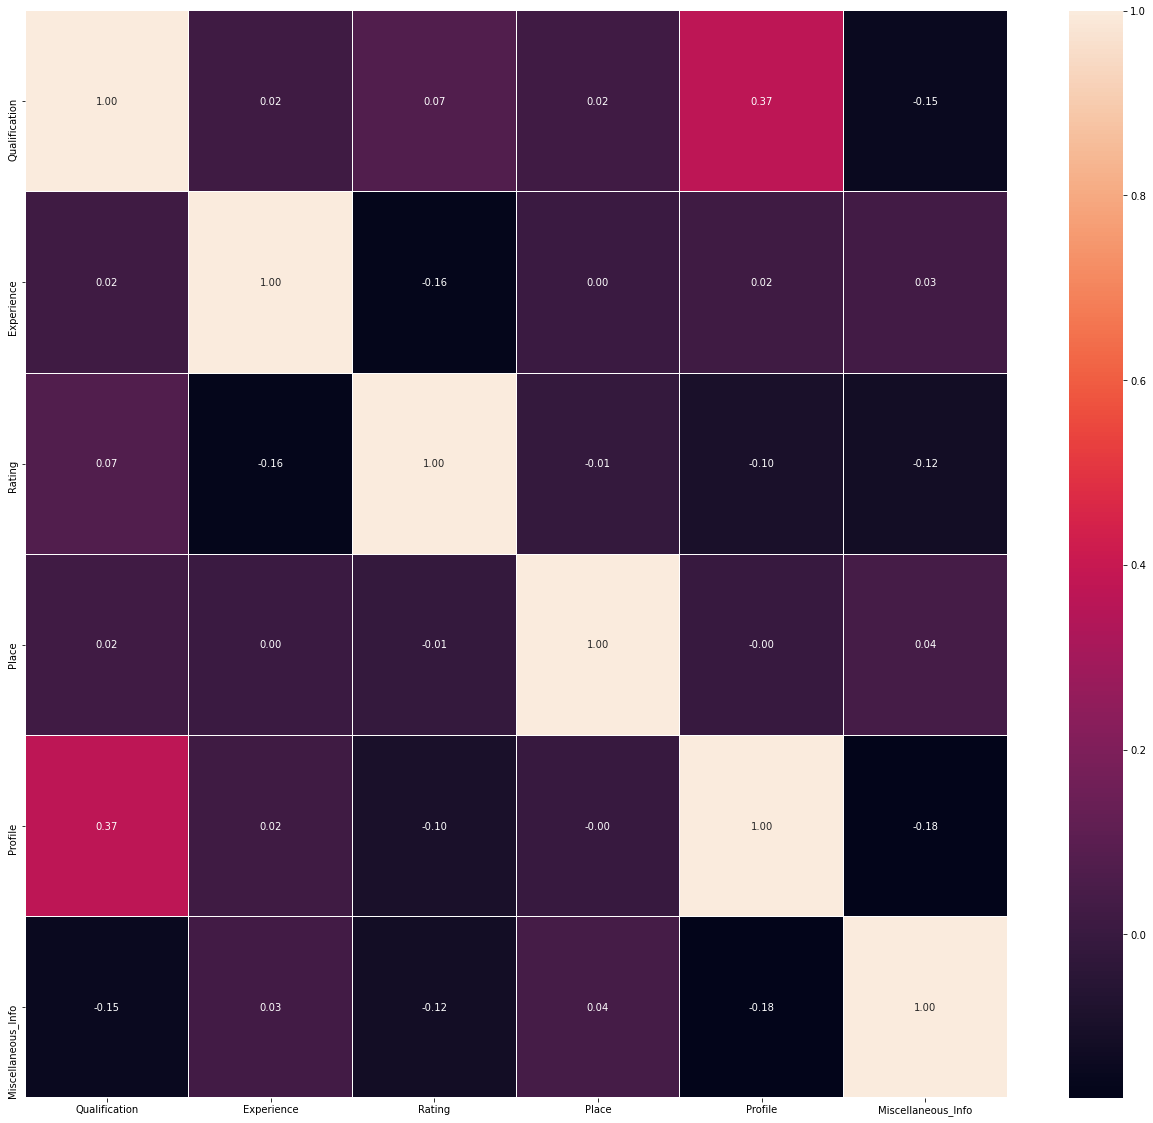

In [78]:
corr_matrix_hmap=df.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [79]:
test_data = df.iloc[:,0:]
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0.0,142.0,4.0,598.0
1,340.0,24.0,0.0,580.0,3.0,598.0
2,258.0,34.0,9.0,212.0,2.0,153.0
3,6.0,0.0,0.0,374.0,0.0,598.0
4,79.0,7.0,0.0,231.0,1.0,816.0


# Load saved model

In [80]:
loaded_model=pickle.load(open('Doctor_Fees.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.18840317948393426


In [81]:
conclusion = pd.DataFrame([loaded_model.predict(test_data)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986
Predicted,270.0,290.00,311.6,219.0,250.0,338.0,338.0,271.5,305.00,266.5,...,291.0,247.0,249.0,275.5,276.0,262.0,296.0,270.0,271.5,313.0
Original,408.0,254.25,392.0,297.6,152.6,252.5,453.0,277.5,307.75,376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
fees =  pd.DataFrame([loaded_model.predict(test_data)[:]])

In [83]:
fees

,0,1,2,3,4,5,6,7,8,9,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986
0,270.0,290.0,311.6,219.0,250.0,338.0,338.0,271.5,305.0,266.5,...,291.0,247.0,249.0,275.5,276.0,262.0,296.0,270.0,271.5,313.0


In [84]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [85]:
df.shape

(1987, 6)

In [86]:
df.insert(6, " Fees", fees.values.reshape(-1,1)) 

In [87]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,241.0,28.0,0.0,142.0,4.0,598.0,270.0
1,340.0,24.0,0.0,580.0,3.0,598.0,290.0
2,258.0,34.0,9.0,212.0,2.0,153.0,311.6
3,6.0,0.0,0.0,374.0,0.0,598.0,219.0
4,79.0,7.0,0.0,231.0,1.0,816.0,250.0
...,...,...,...,...,...,...,...
1982,17.0,1.0,0.0,58.0,0.0,598.0,262.0
1983,548.0,33.0,0.0,96.0,2.0,598.0,296.0
1984,474.0,56.0,0.0,424.0,4.0,598.0,270.0
1985,51.0,3.0,34.0,26.0,1.0,975.0,271.5


#### so Fees in the above df are the predicted values for the test data set